# Convolution & Edge Detection
The purpose of this repository is to demonstrate the concept of the convolution and edge
detection by performing simple manipulations on images.
This repository covers:
- Implementing convolution on 1D and 2D arrays
- Performing image derivative and image blurring
- Sobel Edge detection 
- Canny Edge detection

## Reading an image into a given representation
a function that reads a given image file and converts it into a given representation. 

Nocite that the output image is represented by a matrix of class float with intensities (ei-
their grayscale or RGB channel intensities) normalized to the range [0; 1].

In [1]:
from typing import List
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

LOAD_GRAY_SCALE = 1
LOAD_RGB = 2
IMG_INT_MAX_VAL = 255

def imReadAndConvert(filename: str, representation: int) -> np.ndarray:
    """
    Reads an image, and returns the image converted as requested
    :param filename: The path to the image
    :param representation: GRAY_SCALE or RGB
    :return: The image object
    """
    img = cv2.imread(filename, -1)
    if representation is LOAD_RGB:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize to range [0,1]
    img = img.astype(float) / IMG_INT_MAX_VAL

    if representation is LOAD_GRAY_SCALE \
            and len(img.shape) > 2:
        b, g, r = np.split(img, 3, axis=2)
        img = 0.3 * r + 0.59 * g + 0.11 * b
        img = img.squeeze()
    elif representation is LOAD_RGB \
            and len(img.shape) < 3:
        img = np.stack((img, img, img), axis=2)
    return img

## Convolution

### 1D Convolution
 function that implement convolution of 1 1D discrete signals.

In [2]:
def conv1D(in_signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve a 1-D array with a given kernel
    :param in_signal: 1-D array
    :param kernel: 1-D array as a kernel
    :return: The convolved array
    """
    if len(in_signal.shape) > 1:
        if in_signal.shape[1] > 1:
            raise ValueError("Input Signal is not a 1D array")
        else:
            in_signal = in_signal.reshape(in_signal.shape[0])
            
    inv_k = kernel[::-1].astype(np.float64)
    kernel_len = len(kernel)
    out_len = max(kernel_len, len(in_signal) + (kernel_len - 1))
    padding = kernel_len - 1
    padded_signal = np.pad(in_signal, padding, 'constant')

    out_signal = np.ones(out_len)
    for i in range(out_len):
        st = i
        end = i + kernel_len
        out_signal[i] = (padded_signal[st:end] * inv_k).sum()
    return out_signal

In [3]:
signal = np.array([1.1, 1, 3, 4, 5, 6, 2, 1])
kernel = np.array([1, 2, 2, 1])
sig_conv = conv1D(signal, kernel).astype(int)
sig_conv = conv1D(signal, kernel)
print("Signal:\t{}".format(signal))
print("np.convolve Result:\t{}".format(np.convolve(signal, kernel, 'full')))
print("conv1D Result:     \t{}".format(sig_conv))

Signal:	[1.1 1.  3.  4.  5.  6.  2.  1. ]
np.convolve Result:	[ 1.1  3.2  7.2 13.1 20.  27.  28.  22.  12.   4.   1. ]
conv1D Result:     	[ 1.1  3.2  7.2 13.1 20.  27.  28.  22.  12.   4.   1. ]


### 2D Convolution
 function that implement convolution of  2D discrete signals. (also works on Gray-scale Image)

In [4]:
def conv2D(in_image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Convolve a 2-D array with a given kernel
    :param in_image: 2D image
    :param kernel: A kernel
    :return: The convolved image
    """
    img_h, img_w = in_image.shape[:2]
    kernel_shape = np.array([x for x in kernel.shape])
    mid_ker = kernel_shape // 2
    padded_signal = np.pad(in_image.astype(np.float32),
                           ((kernel_shape[0], kernel_shape[0]),
                            (kernel_shape[1], kernel_shape[1]))
                           , 'edge')

    out_signal = np.zeros_like(in_image)
    for i in range(img_h):
        for j in range(img_w):
            st_x = j + mid_ker[1] + 1
            end_x = st_x + kernel_shape[1]
            st_y = i + mid_ker[0] + 1
            end_y = st_y + kernel_shape[0]
            out_signal[i, j] = (padded_signal[st_y:end_y, st_x:end_x] * kernel).sum()
    return out_signal

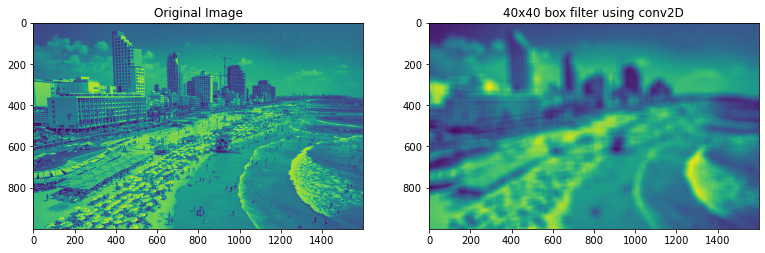

In [5]:
# LOAD IMAGE:
img = imReadAndConvert('TLV_beach.jpg',1)

# SET KERNEL:
kernel = np.ones((40, 40))
kernel = kernel / kernel.sum()

# PERFORM CONVOLUTION USING CONV2D:
c_img = conv2D(img, kernel) / 255

# DISPLAY RESULTS:
f, ax = plt.subplots(1, 2,figsize=(13, 13))
ax[0].imshow(img)
ax[0].set_title('Original Image')  
ax[1].imshow(c_img)
ax[1].set_title('40x40 box filter using conv2D')
plt.show()

### Image Convolution
 function that implement 2D convolution on RGB or Gray Scale Image.

In [6]:
def Image_Conv(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    
    """
    Convolve a 3D array image, for each channel separately with a given kernel
    :param in_image: 2D image (RBG or Gray-Scale)
    :param kernel: A kernel
    :return: The convolved image
    """
    if len(image.shape) == 2:
        conv_image = conv2D(image, kernel)
    else:
        conv_image = np.zeros_like(image)
        for channel in range(image.shape[2]):
            conv_image[:,:,channel] = conv2D(image[:,:,channel], kernel)
    return conv_image

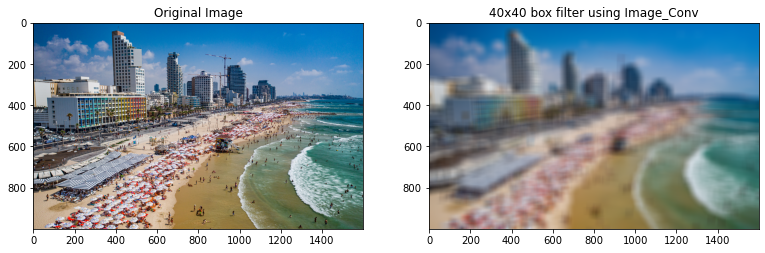

In [7]:
# LOAD IMAGE:
img = imReadAndConvert('TLV_beach.jpg',2)

# SET KERNEL:
kernel = np.ones((40, 40))
kernel = kernel / kernel.sum()

# PERFORM CONVOLUTION USING CONV2D:

c_img = Image_Conv(img, kernel) 

# DISPLAY RESULTS:
f, ax = plt.subplots(1, 2,figsize=(13, 13))
ax[0].imshow(img)
ax[0].set_title('Original Image')  
ax[1].imshow(c_img)
ax[1].set_title('40x40 box filter using Image_Conv')
plt.show()

## Image derivatives & blurring

### Derivatives

A function that computes the magnitude and the direction of an image gradient. The function derive
the image in each direction separately (rows and column) using simple convolution with $ [1,0,-1]^T $ and $ [1,0,-1] $ to get the two image derivatives. 

Next, these derivative images uesed for compute the magnitude and direction matrix and also the x and y derivatives.

The function use the following equations:

$ Mag_G  = ||G|| = \sqrt{I_x^2 + I_y^2}$

$ Direction_G = tan^-1(\frac{I_y}{I_x}) $ 

In [8]:
def convDerivative(in_image: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Calculate gradient of an image
    :param in_image: Grayscale iamge
    :return: (directions, magnitude)
    """
    kernel = np.array([[1, 0, -1]])
    x_drive = conv2D(in_image, kernel)
    y_drive = conv2D(in_image, kernel.T)

    ori = np.arctan2(y_drive, x_drive)
    mag = np.sqrt(x_drive ** 2 + y_drive ** 2)

    return ori, mag

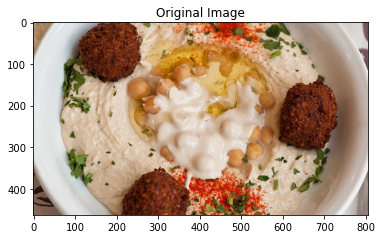

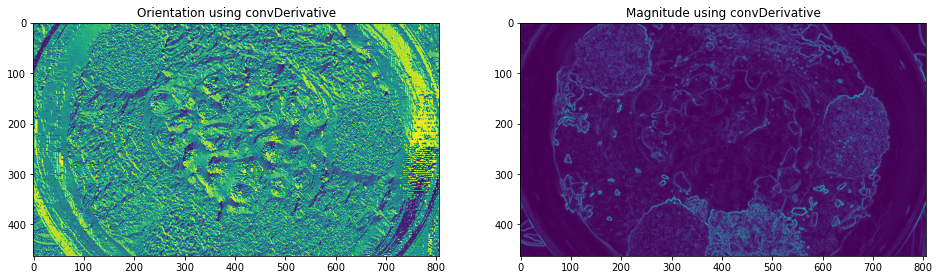

In [9]:
img = imReadAndConvert('Humus.jpg',1)
ori, mag = convDerivative(img)

RGB_img = imReadAndConvert('Humus.jpg',2)  
plt.title('Original Image')
plt.imshow(RGB_img)
    
f, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].set_title('Orientation using convDerivative')
ax[1].set_title('Magnitude using convDerivative')
ax[0].imshow(ori)
ax[1].imshow(mag)
plt.show()

### Blurring
Two functions that each performs image blurring using convolution between the image f and
a Gaussian kernel g. 

blurImage1 using conv2D and Gaussian kernel.

Comments:
- The Gaussian kernel contain approximation of the Gaussian distribution using the binomial coeficients. A consequent 1D convolutions of [1 1] with itself is an
elegant way for obtaining a row of the binomial coeficients. using the 1D binomial coeficients we can get a 2D Gaussian.

the kernel obey the below rule:

$ \sum \limits _{i,j} kernel_{i,j} = 1 $  

- The border of the images padded same as in the 'Convolution' section.
- The size of the Gaussian' kernelSize, is always an odd number.



In [10]:
def createGaussianKernel(k_size: int):
    if k_size % 2 == 0:
        raise ValueError("Kernel size should be an odd number")
    k = np.array([1, 1], dtype=np.float64)
    iter_v = np.array([1, 1], dtype=np.float64)

    for i in range(2, k_size):
        k = conv1D(k, iter_v)
    k = k.reshape((len(k), 1))
    kernel = k.dot(k.T)
    kernel = kernel / kernel.sum()
    return kernel

def blurImage1(inImage: np.ndarray, kernelSize: int) -> np.ndarray:
    """
    Blur an image using a Gaussian kernel
    :param inImage: Input image
    :param kernelSize: Kernel size
    :return: The Blurred image
    """
    kernel = createGaussianKernel(kernelSize)
    if len(inImage.shape) == 2:
        return conv2D(inImage, kernel)
    else: 
        return Image_Conv(inImage, kernel)

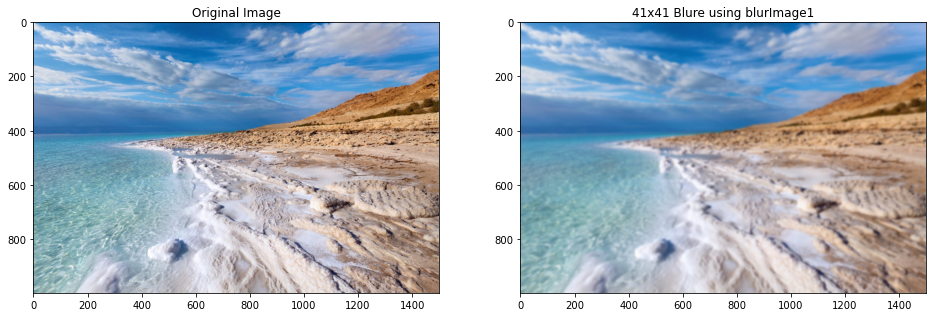

In [11]:
img = imReadAndConvert('Dead_Sea.jpg',2) 
k_size = 41
b1 = blurImage1(img, k_size)

f, ax = plt.subplots(1, 2, figsize=(16,16))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(b1)
ax[1].set_title('41x41 Blure using blurImage1')

plt.show()

## Edge detection
implementation of the following functions:

- edgeDetectionSobel
- edgeDetectionZeroCrossingSimple
- edgeDetectionZeroCrossingLOG
- edgeDetectionCanny



In [12]:
def getSobelMagOri(img: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Extracts the Magnitude and Orientations of deriving the image using the Sobel kernel
    :param img: The Image
    :return: Magnitud, Orientation
    """
    sobel_kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1],
    ]).astype(np.float64)[::-1] / 8.0

    i_x = conv2D(img, sobel_kernel)
    i_y = conv2D(img, sobel_kernel.T)
    mag = np.hypot(i_x, i_y)
    ori = np.arctan2(i_y, i_x)
    return mag, ori

def edgeDetectionSobel(img: np.ndarray, thresh: float = 0.7) -> (np.ndarray, np.ndarray):
    """
    Detects edges using the Sobel method
    :param img: Input image
    :param thresh: The minimum threshold for the edge response
    :return: opencv solution, my implementation
    """
    # My solution
    mag, ori = getSobelMagOri(img)
    my_res = mag
    my_res[my_res < thresh] = 0
    my_res[my_res > 0] = 1
    return my_res

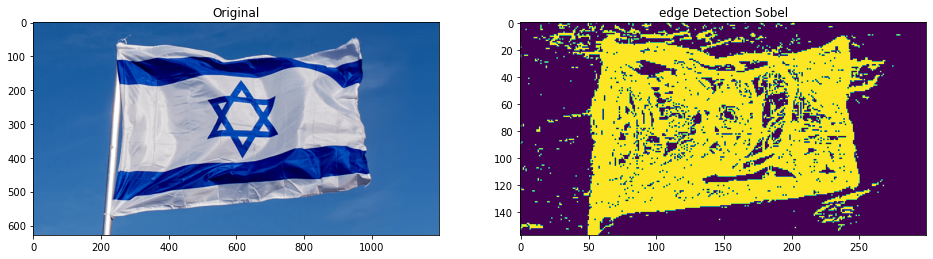

In [13]:
img = imReadAndConvert('Flag.jpg',1)
img = cv2.resize(img, (0, 0), fx=.25, fy=.25)

my = edgeDetectionSobel(img, 0.05 / 8)

f, ax = plt.subplots(1, 2, figsize=(16,16))
ax[0].set_title("Original")
ax[1].set_title("edge Detection Sobel")
ax[0].imshow(imReadAndConvert('Flag.jpg',2))
ax[1].imshow(my)
plt.show()

In [14]:
def edgeDetectionCanny(img: np.ndarray, thrs_1: float, thrs_2: float) -> (np.ndarray, np.ndarray):
    """
    Detecting edges usint "Canny Edge" method
    :param img: Input image
    :param thrs_1: T1
    :param thrs_2: T2
    :return: opencv solution, my implementation
    """
    img = (img * 255).astype(float)

    # Getting Ix and Iy
    img_s = cv2.GaussianBlur(img, (5, 5), 1)
    img_s=img
    i_y = cv2.Sobel(img_s, -1, 0, 1, ksize=3)
    i_x = cv2.Sobel(img_s, -1, 1, 0, ksize=3)
    mag = np.hypot(i_x, i_y)
    ori = np.arctan2(i_y, i_x)

    # Degrees Quantisation
    quant_ori = np.degrees(ori)
    quant_ori[quant_ori < 0] += 180
    quant_ori = np.mod(((22.5 + quant_ori) // 45 * 45), 180)
    quant_ori[quant_ori > 135] = 0

    quant_ori_x = np.zeros_like(quant_ori, dtype=int)
    quant_ori_y = np.zeros_like(quant_ori, dtype=int)

    # angle 0
    quant_ori_x[quant_ori == 0] += 1
    # angle 45
    quant_ori_x[quant_ori == 45] -= 1
    quant_ori_y[quant_ori == 45] -= 1
    # angle 90
    quant_ori_y[quant_ori == 90] += 1
    # angle 135
    quant_ori_x[quant_ori == 135] += 1
    quant_ori_y[quant_ori == 135] -= 1

    h, w = img.shape[:2]
    pix_mag = mag[1:-1, 1:-1].reshape(-1)
    pix_y, pix_x = np.meshgrid(range(1, h - 1), range(1, w - 1))
    pix_x = pix_x.reshape(-1)
    pix_y = pix_y.reshape(-1)

    mag_sort = np.argsort(-pix_mag)
    pix_mag = pix_mag[mag_sort].tolist()
    pix_x = pix_x[mag_sort].tolist()
    pix_y = pix_y[mag_sort].tolist()

    # NMS
    mag_c = mag.copy()
    for max_idx in range(len(pix_mag)):
        ix = pix_x[max_idx]
        iy = pix_y[max_idx]

        grad_x = quant_ori_x[iy, ix]
        grad_y = quant_ori_y[iy, ix]
        v = mag[iy, ix]
        pre = mag[iy - grad_y,
                    ix - grad_x]
        post = mag[iy + grad_y,
                     ix + grad_x]

        if v <= pre or v <= post:
            mag_c[iy, ix] = 0

    # Hysteresis
    thrs_map_2 = ((mag_c >= thrs_2) & (mag_c <= thrs_1)).astype(np.uint8)
    thrs_map_1 = (mag_c >= thrs_1).astype(np.uint8)
    thrs_map_1_dilate = cv2.dilate(thrs_map_1, np.ones((2, 2)))

    canny = (thrs_map_1 | (thrs_map_2 & thrs_map_1_dilate))

    return canny

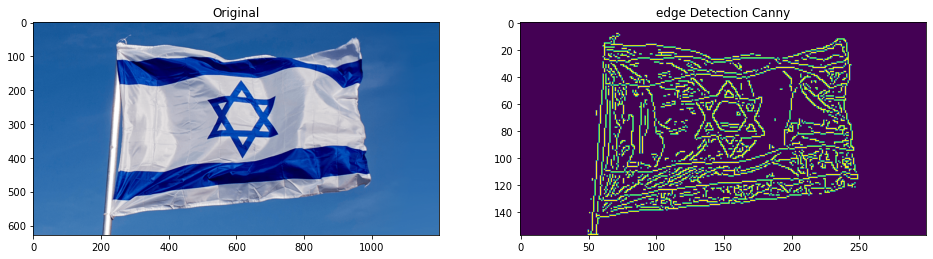

In [15]:
img = cv2.imread('Flag.jpg', cv2.IMREAD_GRAYSCALE) / 255
img = cv2.resize(img, (0, 0), fx=.25, fy=.25)

my = edgeDetectionCanny(img, 50, 25)

f, ax = plt.subplots(1, 2,figsize=(16,16))
ax[0].set_title("Original")
ax[1].set_title("edge Detection Canny")
ax[0].imshow(imReadAndConvert('Flag.jpg',2))
ax[1].imshow(my)
plt.show()